In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
import random
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv(r'C:\Users\new\Music\CUSTOMER_INSIGHTS\DATASET\sentiment.csv', encoding='latin-1')

C:\Users\new\AppData\Local\Temp\ipykernel_22864\1104144106.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'C:\Users\new\Music\CUSTOMER_INSIGHTS\DATASET\sentiment.csv', encoding='latin-1')


In [3]:
data.head()

,ProductName,ProductPrice,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,Super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,Awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,Fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,Useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,Fair,ok ok product,neutral


In [4]:
data.shape

(171380, 6)

In [5]:
#Check the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171380 entries, 0 to 171379
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ProductName   171380 non-null  object
 1   ProductPrice  171379 non-null  object
 2   Rate          171379 non-null  object
 3   Review        171379 non-null  object
 4   Summary       171379 non-null  object
 5   Sentiment     171379 non-null  object
dtypes: object(6)
memory usage: 7.8+ MB


In [6]:
data=data.drop(columns=["ProductName","ProductPrice","Rate"])
data

,Review,Summary,Sentiment
0,Super!,great cooler excellent air flow and for this p...,positive
1,Awesome,best budget 2 fit cooler nice cooling,positive
2,Fair,the quality is good but the power of air is de...,positive
3,Useless product,very bad product its a only a fan,negative
4,Fair,ok ok product,neutral
...,...,...,...
171375,Must buy!,awesome product and clear sound just go it,positive
171376,Perfect product!,good,positive
171377,Slightly disappointed,lot of echo when recording,negative
171378,Moderate,it was not that good as i expected because ya ...,negative


In [7]:
#Check the missing values in the data
data.isnull().sum()

Review       1
Summary      1
Sentiment    1
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
#Check the missing values in the data
data.isnull().sum()

Review       0
Summary      0
Sentiment    0
dtype: int64

In [10]:
data['Sentiment'].value_counts()

positive    111103
negative     41956
neutral      13692
Negative      4163
Neutral        446
Positive        19
Name: Sentiment, dtype: int64

In [11]:
data['Review'] = data['Review'] + " - " + data['Summary']

In [12]:
data

,Review,Summary,Sentiment
0,Super! - great cooler excellent air flow and f...,great cooler excellent air flow and for this p...,positive
1,Awesome - best budget 2 fit cooler nice cooling,best budget 2 fit cooler nice cooling,positive
2,Fair - the quality is good but the power of ai...,the quality is good but the power of air is de...,positive
3,Useless product - very bad product its a only ...,very bad product its a only a fan,negative
4,Fair - ok ok product,ok ok product,neutral
...,...,...,...
171374,Best in the market! - its very awesome product...,its very awesome productby every video makers ...,positive
171375,Must buy! - awesome product and clear sound ju...,awesome product and clear sound just go it,positive
171376,Perfect product! - good,good,positive
171377,Slightly disappointed - lot of echo when recor...,lot of echo when recording,negative


In [13]:
data=data.drop(columns=["Summary"])
data

,Review,Sentiment
0,Super! - great cooler excellent air flow and f...,positive
1,Awesome - best budget 2 fit cooler nice cooling,positive
2,Fair - the quality is good but the power of ai...,positive
3,Useless product - very bad product its a only ...,negative
4,Fair - ok ok product,neutral
...,...,...
171374,Best in the market! - its very awesome product...,positive
171375,Must buy! - awesome product and clear sound ju...,positive
171376,Perfect product! - good,positive
171377,Slightly disappointed - lot of echo when recor...,negative


In [14]:
data['Sentiment'] = data['Sentiment'].str.lower()

In [15]:
data['Sentiment'].value_counts()

positive    111122
negative     46119
neutral      14138
Name: Sentiment, dtype: int64

In [16]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = data[data['Sentiment']== 'positive']
df_minority = data[data['Sentiment']== 'negative']
df_minority1 = data[data['Sentiment']== 'neutral']

# Downsample majority class and upsample the minority class
df_minority1_upsampled = resample(df_minority1, replace=True,n_samples=40000,random_state=123)
df_minority_upsampled = resample(df_minority, replace=True,n_samples=40000,random_state=123)
df_majority_downsampled = resample(df_majority, replace=False,n_samples=40000,random_state=123)

# Combine minority class with downsampled majority class
df_upsampled = pd.concat([df_minority1_upsampled,df_minority_upsampled, df_majority_downsampled])

# Display new class counts
df_upsampled['Sentiment'].value_counts()

neutral     40000
negative    40000
positive    40000
Name: Sentiment, dtype: int64

In [17]:
# shuffle the DataFrame rows
data= df_upsampled.sample(frac = 1)

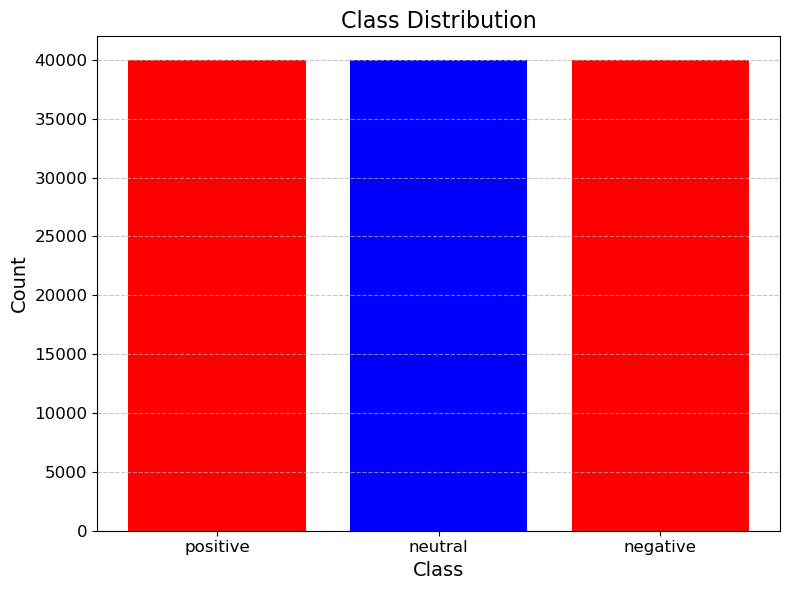

In [18]:
plt.figure(figsize=(8, 6))
# Get the counts of each class
class_counts = data['Sentiment'].value_counts()

# Use the index (class names) and values (counts) for the bar plot
plt.bar(class_counts.index, class_counts.values, color=['red', 'blue'])
plt.title('Class Distribution', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Display the graph
plt.show()

In [19]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [20]:
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [21]:
data['Review'].head(5)

158610    Terrific - good but sound no loud nice bass va...
98698                               Decent product - its ok
9002            Worth the money - this product is very nice
75989                                   does the job - okay
68054     unsatisfactory - play 3 days and crack middle ...
Name: Review, dtype: object

In [22]:
print("printing some random reviews")
print(9, data['Review'].values[9])
print(34, data['Review'].values[34])
print(147, data['Review'].values[147])

printing some random reviews
9 Good - other brand give two bowl but this brand give only one why
34 Not recommended at all - door gaskit leak lossmony
147 Super! - good phone


In [23]:
# Combining all the above stundents
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [24]:
preprocessed_text = preprocess_text(data['Review'].values)

100%|████████████████████████████████████████████████████████████████████████| 120000/120000 [00:12<00:00, 9954.33it/s]


In [25]:
print("printing some random reviews")
print(9, preprocessed_text[9])
print(34, preprocessed_text[34])
print(147, preprocessed_text[147])

printing some random reviews
9 good brand give two bowl brand give one
34 not recommended door gaskit leak lossmony
147 super good phone


In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data['Sentiment'] = le.fit_transform(data['Sentiment'])
data

,Review,Sentiment
158610,Terrific - good but sound no loud nice bass va...,2
98698,Decent product - its ok,1
9002,Worth the money - this product is very nice,2
75989,does the job - okay,1
68054,unsatisfactory - play 3 days and crack middle ...,0
...,...,...
71057,just okay - ok but need to improve quality min...,1
99429,Fair - not very satisfied,0
520,Highly recommended - good product,2
93693,Worst experience ever! - Prodact damage,0


Text(0.5, 1.0, 'Positive Word Cloud')

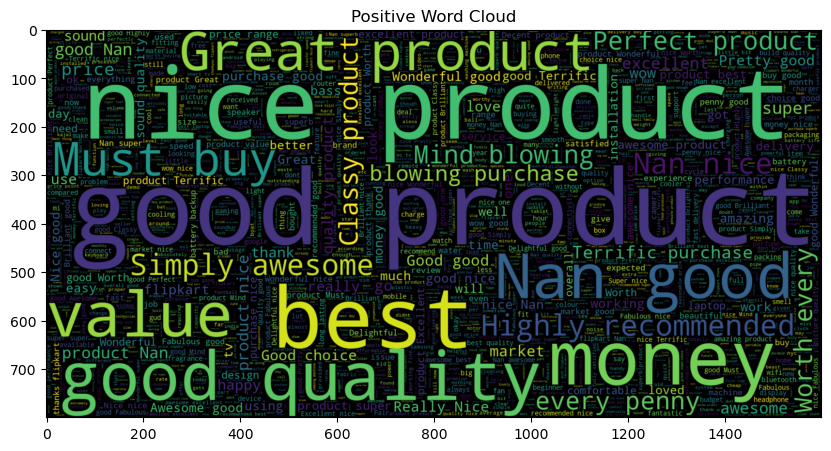

In [27]:
#Positive word cloud
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud

plt.figure(figsize=(10,10))
wc=WordCloud(max_words=2000,width=1600,height=800).generate(' '.join(data[data['Sentiment']==2].Review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title("Positive Word Cloud")

Text(0.5, 1.0, 'negative Word Cloud')

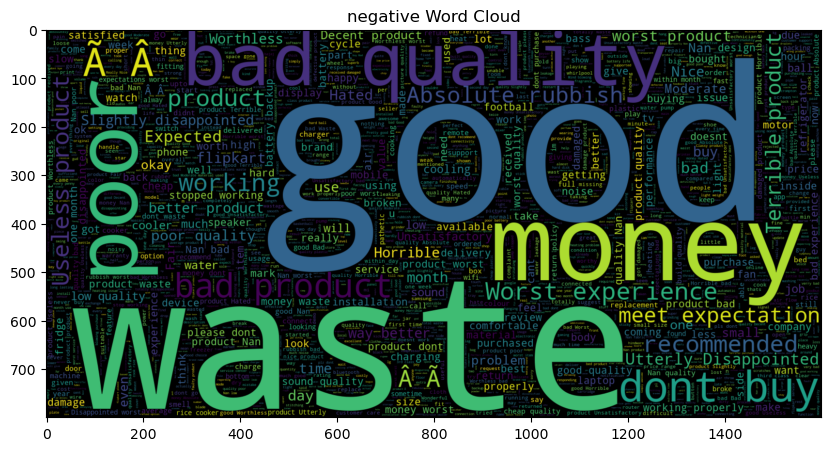

In [28]:
#negative word cloud
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud

plt.figure(figsize=(10,10))
wc=WordCloud(max_words=2000,width=1600,height=800).generate(' '.join(data[data['Sentiment']==0].Review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title("negative Word Cloud")

Text(0.5, 1.0, 'neutral Word Cloud')

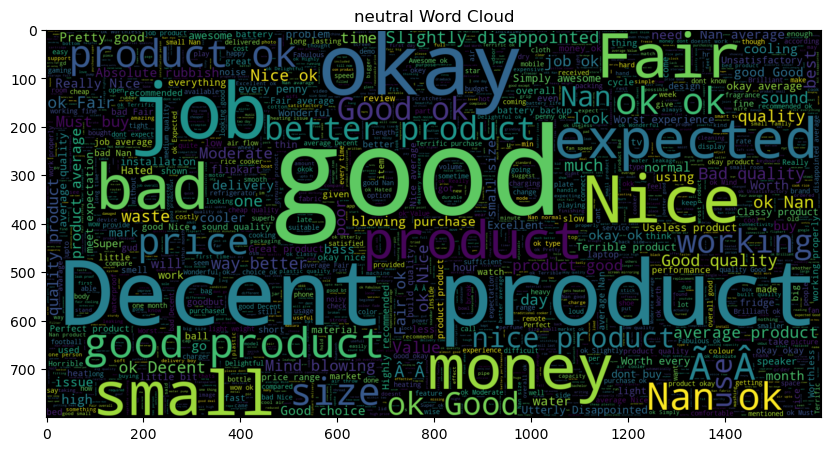

In [29]:
#neutral word cloud
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud

plt.figure(figsize=(10,10))
wc=WordCloud(max_words=2000,width=1600,height=800).generate(' '.join(data[data['Sentiment']==1].Review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title("neutral Word Cloud")

In [30]:
y=np.array(data['Sentiment'])

In [31]:
from sklearn.model_selection import train_test_split
#Breaking into Train and test
X_train, X_test, y_train, y_test = train_test_split(preprocessed_text, y, test_size=0.3,stratify=y ,random_state=42)

In [32]:
import pickle

In [33]:
from sklearn import preprocessing

count_vect = CountVectorizer()
count_trans = count_vect.fit(X_train) # fit has to happen only on train data

# Dump the file
pickle.dump(count_trans, open(r"C:\Users\new\Music\CUSTOMER_INSIGHTS\count_vect.pkl", "wb"))


# Testing phase
count = pickle.load(open(r"C:\Users\new\Music\CUSTOMER_INSIGHTS\count_vect.pkl", 'rb'))

# we use the fitted CountVectorizer to convert the text to vector
X_train_count =count.transform(X_train)
X_test_count = count.transform(X_test)

#Normalize Data
X_train_count = preprocessing.normalize(X_train_count)#It's likely a matrix where each row represents a training example and each column represents a feature.
print("Train Data Size: ",X_train_count.shape)

#Normalize Data
X_test_count = preprocessing.normalize(X_test_count)#usually [0, 1] or [-1, 1]. This can help improve the performance of machine learning algorithms.
print("Test Data Size: ",X_test_count.shape)# rows and columns shape means

Train Data Size:  (84000, 24013)
Test Data Size:  (36000, 24013)


In [34]:
from sklearn.metrics import accuracy_score

In [35]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# Training XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=50,  # Number of trees (boosting rounds)
    max_depth=20        # Maximum depth of a tree
)
xgb_model.fit(X_train_count, y_train)

# Saving the model
filename = r'C:\Users\new\Music\CUSTOMER_INSIGHTS\xgboost_model.pkl'
pickle.dump(xgb_model, open(filename, 'wb'))

# Making predictions
pred_test = xgb_model.predict(X_test_count)
test_accuracy = accuracy_score(y_test, pred_test)
pred_train = xgb_model.predict(X_train_count)
train_accuracy = accuracy_score(y_train, pred_train)

# Printing accuracies
print("Accuracy on Test data is " + str(test_accuracy))
print("Accuracy on Train data is " + str(train_accuracy))

print("---------------------------")

C:\Users\new\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [15:50:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy on Test data is 0.9026666666666666
Accuracy on Train data is 0.9421785714285714
---------------------------


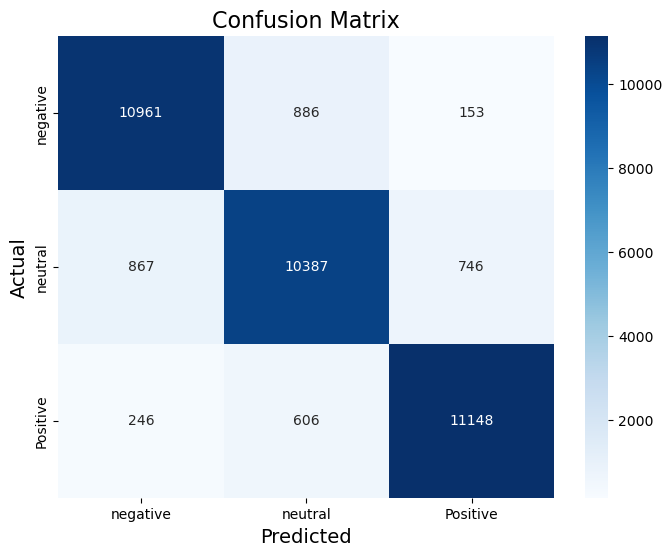

In [36]:
# Confusion matrix and heatmap
class_names = ['negative', 'neutral','Positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test), index=class_names, columns=class_names)
fig = plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.show()

In [37]:
from sklearn.metrics import accuracy_score, classification_report
class_names = ['negative', 'neutral','Positive']
print("Classification Report:")
print(classification_report(y_test, pred_test, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.91      0.91     12000
     neutral       0.87      0.87      0.87     12000
    Positive       0.93      0.93      0.93     12000

    accuracy                           0.90     36000
   macro avg       0.90      0.90      0.90     36000
weighted avg       0.90      0.90      0.90     36000



In [38]:
!pip install lightgbm

In [39]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(boosting_type='goss')
lgbm.fit(X_train_count, y_train)

# Saving the model
filename = r'C:\Users\new\Music\CUSTOMER_INSIGHTS\lgbm_model.pkl'
pickle.dump(lgbm, open(filename, 'wb'))

# Making predictions
pred_test = lgbm.predict(X_test_count)
test_accuracy = accuracy_score(y_test, pred_test)
pred_train = lgbm.predict(X_train_count)
train_accuracy = accuracy_score(y_train, pred_train)

# Printing accuracies
print("Accuracy on Test data is " + str(test_accuracy))
print("Accuracy on Train data is " + str(train_accuracy))

print("---------------------------")

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.617354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 44146
[LightGBM] [Info] Number of data points in the train set: 84000, number of used features: 2040
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] Found 

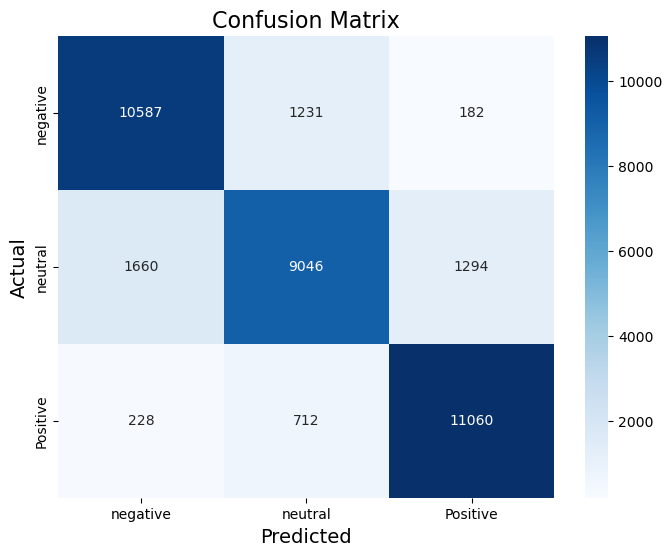

In [40]:
# Confusion matrix and heatmap
class_names = ['negative', 'neutral','Positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test), index=class_names, columns=class_names)
fig = plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.show()

In [41]:
from sklearn.metrics import accuracy_score, classification_report
class_names = ['negative', 'neutral','Positive']
print("Classification Report:")
print(classification_report(y_test, pred_test, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.88      0.87     12000
     neutral       0.82      0.75      0.79     12000
    Positive       0.88      0.92      0.90     12000

    accuracy                           0.85     36000
   macro avg       0.85      0.85      0.85     36000
weighted avg       0.85      0.85      0.85     36000

